<AxesSubplot:xlabel='City'>

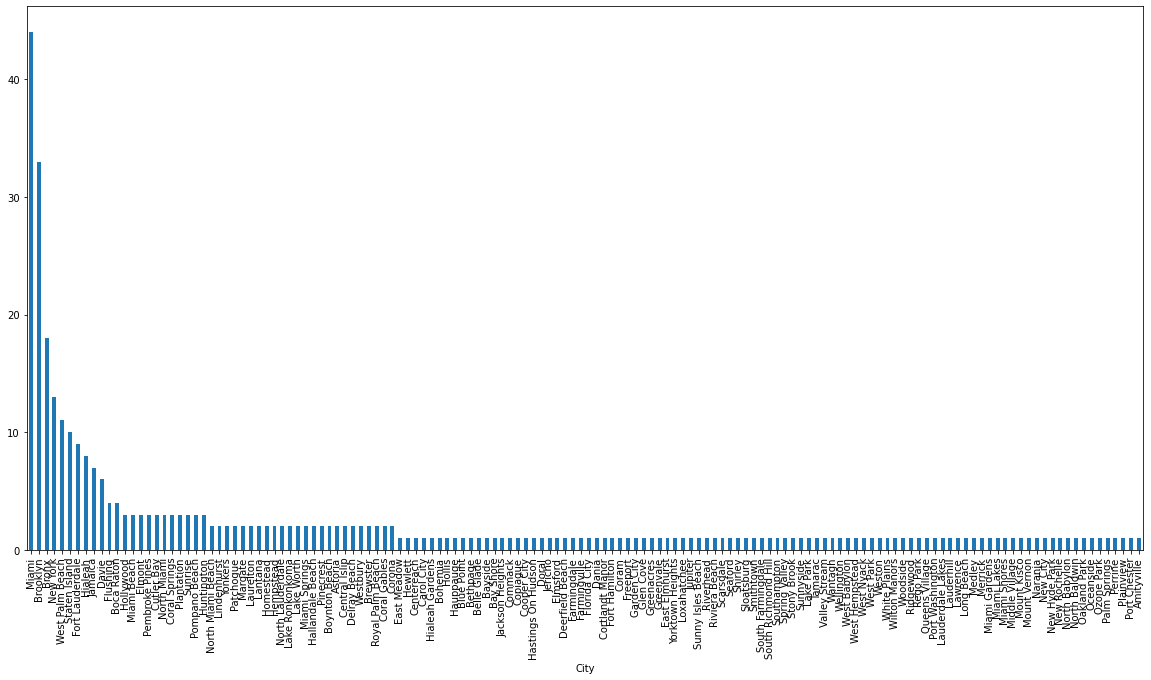

In [31]:
plt.figure(figsize=(20,20))
df.groupby(['City'])['ZIP Code'].count().sort_values(ascending=False).plot.bar()

# Data Cleaning Methodology

## Census API Data Pull

In [22]:
# !pip install matplotlib

You should consider upgrading via the '/Users/phillipbeltre/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
!pip install census

In [2]:
!pip install us

In [9]:
# Import Libraries for API Key
from census import Census
from us import states
import csv
import time
import pdb
import pandas as pd
import os
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np

# Initialize Census object with API key to utilize census python wrapper to pull data
c = Census("a843158c55ae161d6ec8bfe7530da4c8e5acebbc")

The below is an example of a dictionary we will build out that will contain all of the tables
we intend to make request to in the census api. We will leverage the **sub-group** as the key (i.e. B17015_038E) and **description** as the value. Overall, we intend to make request for each of these categories and likely more as the project develops:
- unemployment rate
- Poverty Rate
- Median Household Income rate
- Educational Attainment
- Race/demographics
- Geo-location
- AT HOME FOR THE POPULATION 25 YEARS AND OVER
- Per capita income

In [4]:
# Key is an example of the name that needs to be passed in to get data
tables_dict = {
    'B17015_038E': "POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILIES BY FAMILY TYPE BY SOCIAL SECURITY INCOME BY SUPPLEMENTAL SECURITY INCOME (SSI) AND CASH PUBLIC ASSISTANCE INCOME",
    'B23025_004E': "Estimate!!Total!!In labor force!!Civilian labor force!!Employed",
    'B23025_005E': "Estimate!!Total!!In labor force!!Civilian labor force!!Unemployed",
    'B23025_003E': "Estimate!!Total!!In labor force!!Civilian labor force",
    "B23025_002E": "Estimate!!Total!!In labor force",
    "B23025_007E": "Estimate!!Total!!Not in labor force",
    "B19301E_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301A_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301D_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301C_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301B_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301H_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301I_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301G_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19301F_001E": "Estimate!!Per capita income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19013_001E": "Estimate!!Median household income in the past 12 months (in 2018 inflation-adjusted dollars)",
    "B19019_001E": "MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) BY HOUSEHOLD SIZE",
    "B19058_001E": "PRECEIPT OF FOOD STAMPS/SNAP IN THE PAST 12 MONTHS BY POVERTY STATUS IN THE PAST 12 MONTHS FOR HOUSEHOLDS",
    "B22003_001E": "PUBLIC ASSISTANCE INCOME OR FOOD STAMPS/SNAP IN THE PAST 12 MONTHS FOR HOUSEHOLDS",
    "B19113C_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER)",
    "B19113D_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (ASIAN ALONE HOUSEHOLDER)",
    "B19113A_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE HOUSEHOLDER)",
    "B19113B_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)",
    "B19113G_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (TWO OR MORE RACES)",
    "B19113H_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE NOT HISPANIC OR LATINO HOUSEHOLDER))",
    "B19113E_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE HOUSEHOLDER)",
    "B19113F_001E": "MEDIAN FAMILY INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (SOME OTHER RACE ALONE HOUSEHOLDER)",
    "B19013_001E": "MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)",
    "B99191_001E": "ALLOCATION OF INDIVIDUALS' INCOME IN THE PAST 12 MONTHS FOR THE POPULATION 15 YEARS AND OVER - PERCENT OF INCOME ALLOCATED",
    "B19202F_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (SOME OTHER RACE ALONE HOUSEHOLDER)",
    "B19202G_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (TWO OR MORE RACES HOUSEHOLDER)",
    "B19202H_001E": "|MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (WHITE ALONE NOT HISPANIC OR LATINO HOUSEHOLDER)|",
    "B19050_001E": "AGGREGATE HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) BY AGE OF HOUSEHOLDER",
    "B19202I_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (HISPANIC OR LATINO HOUSEHOLDER)",
    "B19202B_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (BLACK OR AFRICAN AMERICAN ALONE HOUSEHOLDER)",
    "B19202C_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (AMERICAN INDIAN AND ALASKA NATIVE ALONE HOUSEHOLDER)",
    "B19202D_001E": "MEDIAN NONFAMILY HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS) (ASIAN ALONE HOUSEHOLDER)",
    "B15001_001E": "SEX BY AGE BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 18 YEARS AND OVER",
    "B01002_001E": "MEDIAN AGE BY SEX",
    "B23025_001E": "EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER",
    "B19301_001E": "PER CAPITA INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)",
    "B01002G_001E": "MEDIAN AGE BY SEX (TWO OR MORE RACES)",
    "B01002H_001E": "|MEDIAN AGE BY SEX (WHITE ALONE NOT HISPANIC OR LATINO)",
    "B01002I_001E": "MEDIAN AGE BY SEX (HISPANIC OR LATINO)",
    "B01002C_001E": "MEDIAN AGE BY SEX (AMERICAN INDIAN AND ALASKA NATIVE ALONE)",
    "B01002D_001E": "MEDIAN AGE BY SEX (ASIAN ALONE)",
    "B01002E_001E": "MEDIAN AGE BY SEX (NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE)",
    "B01002F_001E": "HMEDIAN AGE BY SEX (SOME OTHER RACE ALONE)",
    "B01002A_001E": "MEDIAN AGE BY SEX (WHITE ALONE)",
    "B01002B_001E": "MEDIAN AGE BY SEX (BLACK OR AFRICAN AMERICAN ALONE)",

}

The below cell iterates through each key in our `tables_dict`. We will use the key as the name of the csv, referncing the `tables_dict` to remember the data we are using. 

For each key we iterate through, we will be iterating through the years for the ACS5 dataset, which is:

> The 5-year estimates from the ACS are "period" estimates that represent data collected over a period of time.

For each year, we will:
1. Make a get request `c.acs5.state_county` at the state-county level for the specified sub-group (i.e. B17015_038E)
2. We will index into the first object in the response to leverage as out columns
3. Finally, we will iterate through each state-county response and write them to the file

In [5]:
os.getcwd()

'/home/jovyan/work/repos/team-57'

In [ ]:
# Years we want to collect. The census api already has this attribute, so we don't errneously
# pull years not available
# years = c.acs5.years

# for key in tables_dict.keys():
#     try:
#         path = os.path.join(os.getcwd(), key[:6])
#         if not os.path.exists(path):
#             os.mkdir(path)
#         with open(f'{path}/{key}.csv', 'w', newline='') as csvfile:
#             spamwriter = csv.writer(csvfile)
            
#             # Iterate through years
#             for idx, year in enumerate(years):
#                 # Fetch data
#                 response = c.acs5.state_county(('NAME', key), Census.ALL, Census.ALL, year=year)
                
#                 # Check if this is the first index so we don't re-write headers each time.
#                 if idx == 0:
#                     # Collect columns and write them as the header
#                     columns = list(response[0].keys()) + ['year']
#                     spamwriter.writerow(columns)
                
#                 # Iterate through each nested response and write them to the csv
#                 for row in response:
#                     #pdb.set_trace()
#                     spamwriter.writerow([row[name] for name in list(response[0].keys())] + [year])
                
#                 # Delay script every 30 secs so that we don't get flagged for request abuse
#                 time.sleep(10)
#     except:
#         continue

Once all of the data has been collected, we will do some data cleaning. Example of this is shown below, splitting the *state* and *county* from the **NAME** column and placing them into their respective columns.

In addition to the above, we intend to:
- Aggregate *geo-location* and other elements to the tables we create.
- Assess `Null`/`0` values to see if we want to retain them

In [6]:
#don't need to run anymore
#merging
for subdir, dirs, files in os.walk('files/'):
    if len(dirs) > 0:
        for d in dirs:
            p = os.path.join('files/', d)
            temp_list = []
            for file in os.listdir(p):
                if file.endswith('.csv'):
                    temp_list.append(pd.read_csv(p + '/' + file))
            print(d)
            if d[0] == "B":
                df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['NAME', 'state', 'county', 'year'],
                                                how='left'), temp_list)

                df_merged.to_csv(f'files/{d}_merged.csv', index=False)
            else:
                df_merged = pd.concat(temp_list)
                df_merged.to_csv(f'files/{d}_merged.csv', index=False)


                


B01002
B15001
B17015
B19013
B19019
B19050
B19058
B19113
B19202
B19301
B22003
B23025
B99191
aldi_docs
bk_docs
ctown_docs
trader
wendys
whole_foods


### Move files

In [7]:
#don't need to run
for file in os.listdir('files/'):
    if file.endswith('merged.csv'):
        os.rename(os.path.join('files/', file), os.path.join('merged_files/', file))

### Clean Data

In [ ]:
# Split and pass into columns
#instructional code
df['county'] = df['NAME'].str.split(',').str[0]
df['state'] = df['NAME'].str.split(',').str[1]
df.drop('NAME', inplace=True, axis=1)

In [10]:
# Replace negative values with 0s. Reqiures investigation
for data in os.listdir('merged_files/'):
    if data.startswith('B'):
        df = pd.read_csv(f'merged_files/{data}')
        df.replace(-666666666.0, np.nan, inplace=True)
        df.to_csv(f'merged_files/{data}',index=False)

In [ ]:
#Suliat will: split files by state and county and then filter for miami and nyc
# select subset for NYC and Miami
#Betty will: drop columns for corporations

### Describe Data

In [11]:
# General Summary Stats of census tables
for data in os.listdir('merged_files/'):
    if data.startswith('B'):
        df = pd.read_csv(f'merged_files/{data}')
        print('\n \n')
        print(f"Table Describtion for: {data} \n")
        print(df.describe())
        print('\n \n')



 

Table Describtion for: B01002_merged.csv 

       B01002A_001E         state        county          year  B01002B_001E  \
count  32205.000000  32205.000000  32205.000000  32205.000000   8943.000000   
mean      42.360441     31.293743    103.008943   2013.499612     34.154288   
std        5.122901     16.275521    106.815913      2.872326     10.341631   
min       21.300000      1.000000      1.000000   2009.000000      0.000000   
25%       39.500000     19.000000     35.000000   2011.000000     28.100000   
50%       42.400000     30.000000     79.000000   2013.000000     33.900000   
75%       45.300000     46.000000    133.000000   2016.000000     39.000000   
max       68.200000     72.000000    840.000000   2018.000000     95.300000   

       B01002C_001E  B01002D_001E  B01002E_001E  B01002F_001E  B01002G_001E  \
count  26845.000000  26267.000000   9320.000000  27933.000000  31347.000000   
mean      37.825833     36.018510     31.109828     29.112190     21.987683   
std 


 

Table Describtion for: B19301_merged.csv 

        B19301A_001E         state        county          year   B19301B_001E  \
count   32202.000000  32205.000000  32205.000000  32205.000000   28459.000000   
mean    25680.451028     31.293743    103.008943   2013.499612   15357.392811   
std      7121.854063     16.275521    106.815913      2.872326   10383.859814   
min      5310.000000      1.000000      1.000000   2009.000000   -5047.000000   
25%     21657.250000     19.000000     35.000000   2011.000000   10229.500000   
50%     24721.000000     30.000000     79.000000   2013.000000   14146.000000   
75%     28532.000000     46.000000    133.000000   2016.000000   18587.000000   
max    100143.000000     72.000000    840.000000   2018.000000  532063.000000   

        B19301C_001E   B19301D_001E   B19301E_001E  B19301F_001E  \
count   25140.000000   24345.000000    7153.000000  2.624100e+04   
mean    18796.729077   25306.647813   22491.222005  1.529513e+04   
std     11836.47740


 

Table Distribution for: B01002_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B23025_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B17015_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B99191_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B19202_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B19013_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B19113_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B19301_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B19058_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B15001_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distribution for: B22003_merged.csv 

AxesSubplot(0.125,0.125;0.775x0.755)

 


 

Table Distributio

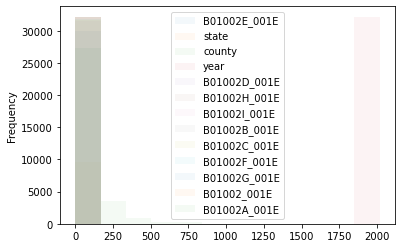

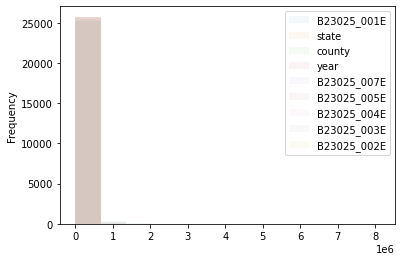

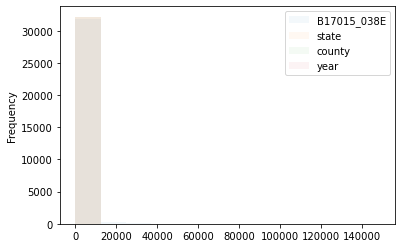

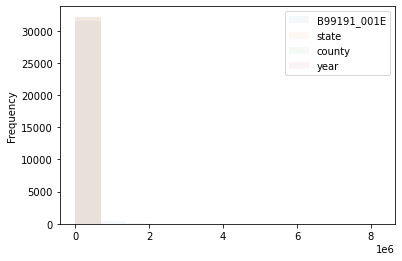

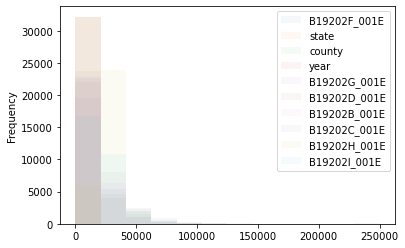

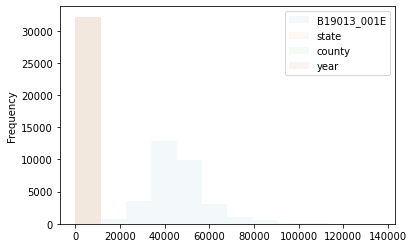

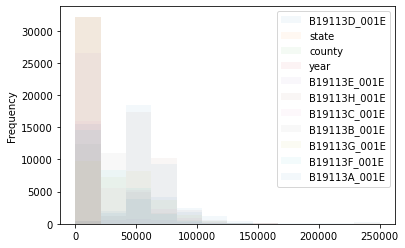

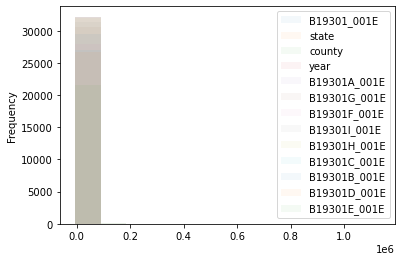

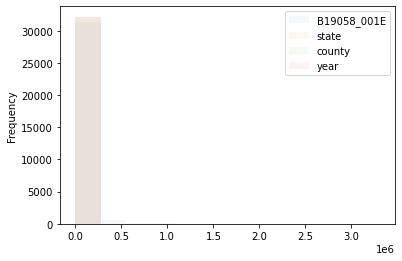

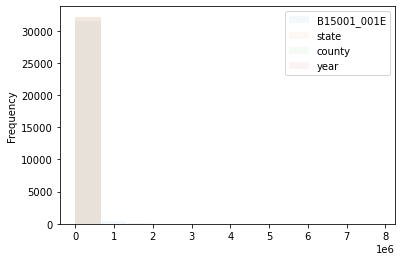

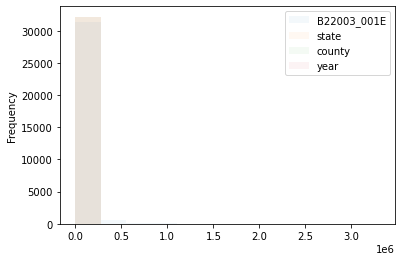

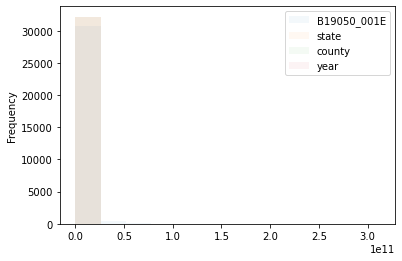

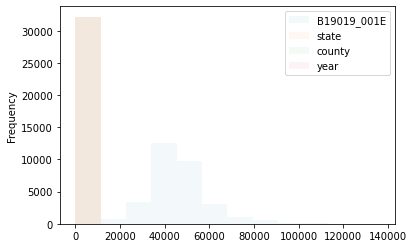

In [4]:
# Distributions of Census tables
for data in os.listdir('merged_files/'):
    if data.startswith('B'):
        df = pd.read_csv(f'merged_files/{data}')
        print('\n \n')
        print(f"Table Distributions for: {data} \n")
        print(df.plot.hist(bins=12, alpha=.05))
        print('\n \n')


In [20]:
df.head()

,B17015_038E,state,county,year
0,497.0,Mississippi,Washington County,2018
1,124.0,Mississippi,Perry County,2018
2,46.0,Mississippi,Choctaw County,2018
3,212.0,Mississippi,Itawamba County,2018
4,41.0,Mississippi,Carroll County,2018


In [5]:
# Look at burker kings by location
df = pd.read_csv(f'merged_files/bk_docs_merged.csv')

In [13]:
name = 'betty'
sentence = f'Hi my name is {name}'
print(sentence)

Hi my name is betty


<AxesSubplot:xlabel='City'>

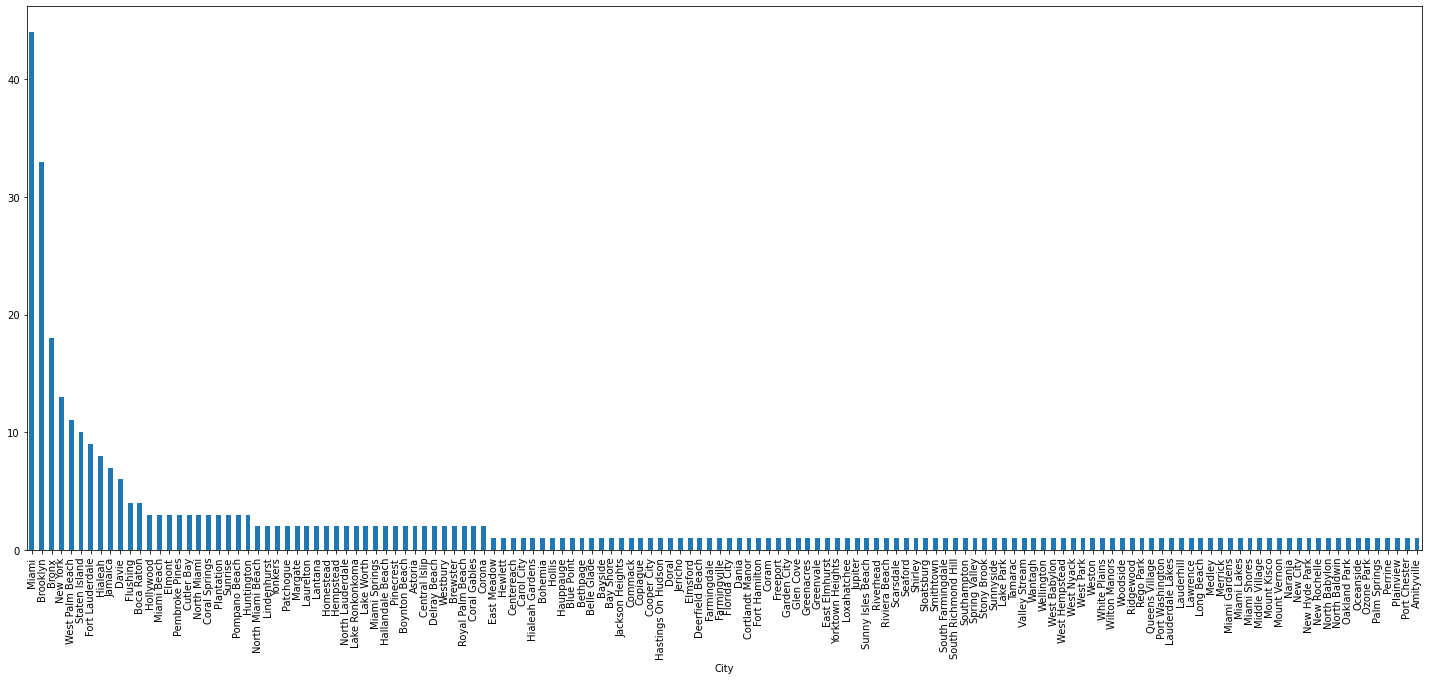

In [43]:
# Look at burker kings by location
df = pd.read_csv(f'merged_files/bk_docs_merged.csv')
plt.figure(figsize=(25,10))
df.groupby('City')['ZIP Code'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='City'>

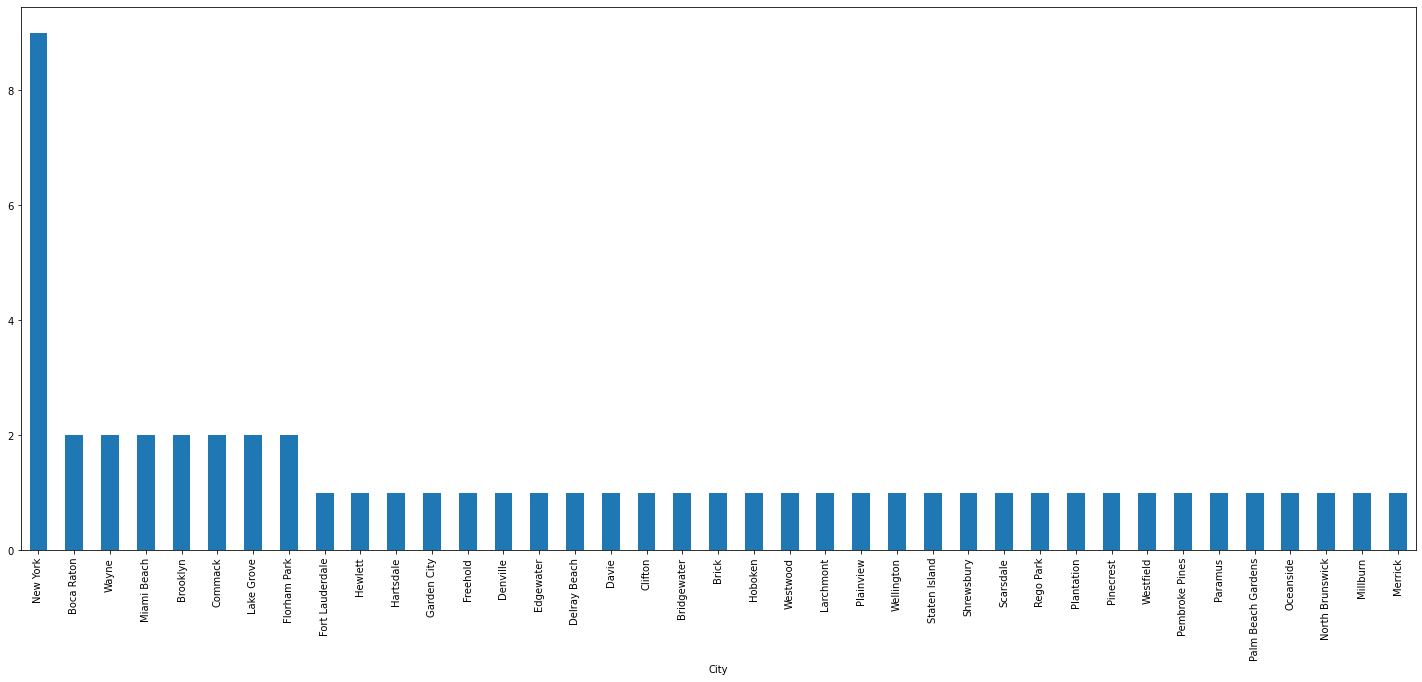

In [44]:
# Look at burker kings by location
df = pd.read_csv(f'merged_files/trader_merged.csv')
plt.figure(figsize=(25,10))
df.groupby('City')['ZIP Code'].count().sort_values(ascending=False).plot.bar()